# Lead Scoring Case study

# 1. Read and understand the data

In [151]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [154]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head(5)
type(data)

pandas.core.frame.DataFrame

In [158]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2. Cleaning and  EDA

## 2.1 Checking for duplicate columns and removing redundant column

In [159]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [160]:
#checking duplicates
sum(data.duplicated(subset = 'Prospect ID')) 
# No duplicate values
#as above value is 0

0

In [5]:
#dropping Lead Number and Prospect ID since they have all unique values

data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

## 2.2 Taking care of Select value in Colomns 
### this is equivalent to null as prospects have not choosen any value

In [6]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [163]:
data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

## 2.3 Getting null percentages and removing columns with high null values

In [164]:
#getting null value upto two decimal places
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Lets remove columns Lead Profile  ,How did you hear about X Education  as they have high null values
data.drop(['Lead Profile', 'How did you hear about X Education'], axis=1 , inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Lets also drop Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score as they have high null values and dont seem important 

data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis=1 , inplace=True)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,Low in Relevance,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,NaN,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified



## 2.4 Taking care of other columns which are important but have high null values(like lead Quality)
### Imputing the values
#### Lead Quality

In [11]:
# Its an categorical varianle lets try to plot and see the value that can be imputed
data['Lead Quality'].describe()


count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

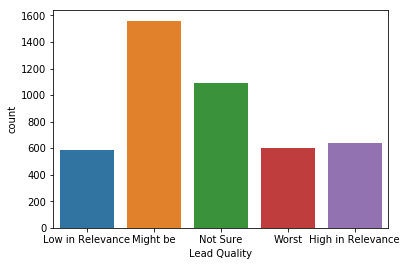

In [12]:
sns.countplot(data['Lead Quality'])

### Imputing Lead Quality with "Not sure lead qualtity" as its based on data n intution

In [13]:

data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')


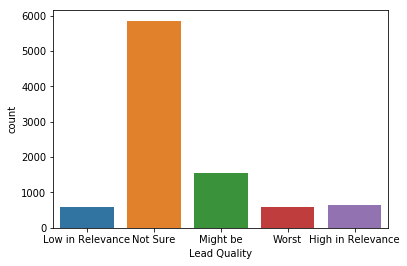

In [14]:
sns.countplot(data['Lead Quality'])

#### City-39.71 null

In [15]:
data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

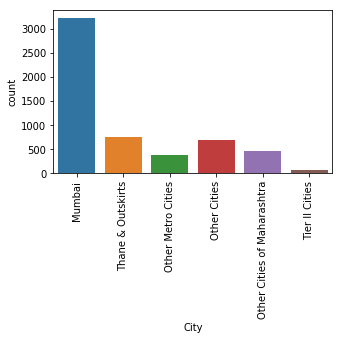

In [16]:
plt.figure(figsize=(5,3))
xticks(rotation = 90)
sns.countplot(data.City)

In [17]:
# Majority of the data is Mumbai so we can impute Mumbai in the missing values.
data['City'] = data['City'].replace(np.nan, 'Mumbai')

In [18]:
data.City.describe()

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object

#### Specialization 36.58 null

In [19]:
data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

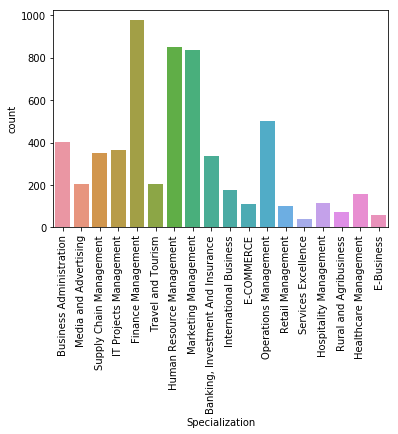

In [20]:
sns.countplot(data.Specialization)
xticks(rotation = 90)

In [21]:
## As it has a lot of different fields lets add one more category as others
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

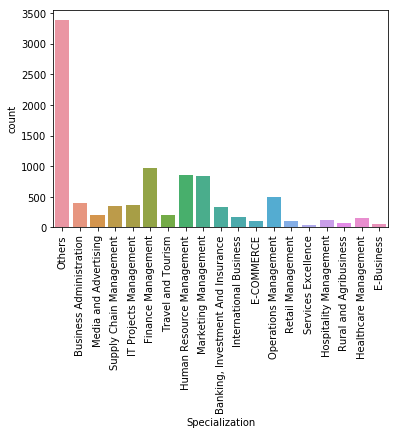

In [22]:
sns.countplot(data.Specialization)
xticks(rotation = 90)

#### Tags 36.29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

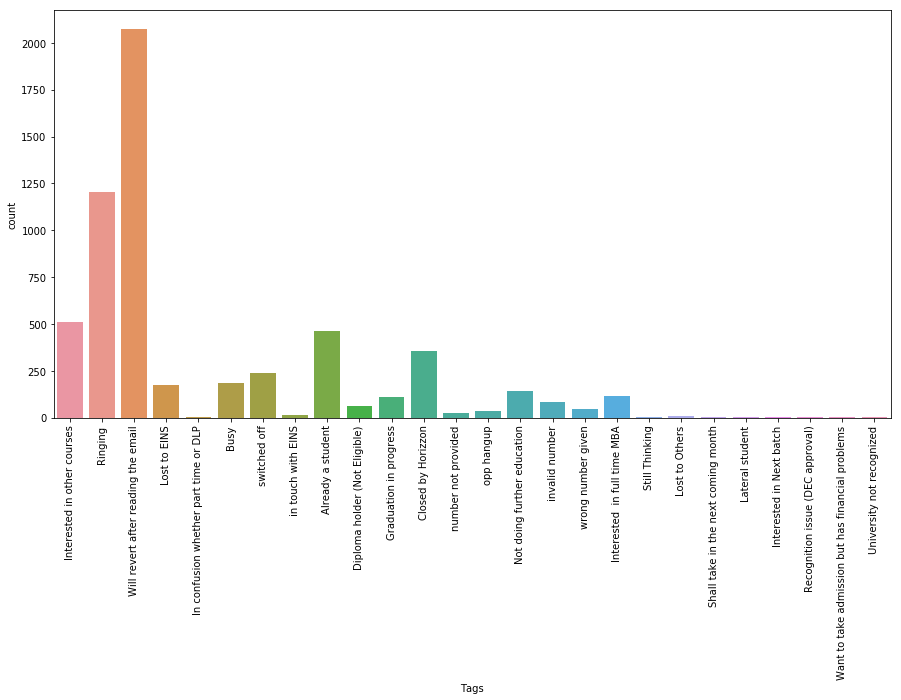

In [23]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(data.Tags)
xticks(rotation = 90)

In [24]:
# Create a category unknown in case of tags
data['Tags'] = data['Tags'].replace(np.nan, 'Unknown')

#### What matters most to you in choosing a course

In [25]:
data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [26]:
## lets impute with top as freq is high
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#### Occupation

In [27]:
data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [28]:
## lets impute with top as freq is high
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, 'Unemployed')

#### Country

In [29]:
data['Country'].describe()


count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [30]:
## lets impute with top as freq is high
data['Country'] = data['Country'].replace(np.nan, 'India')

In [31]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

## Now as all the high missing values are imputed lets drop the rows of remaining missing values

In [32]:
data.dropna(inplace = True)

In [33]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

## 2.5 In lead score there are too many values cleaning that

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

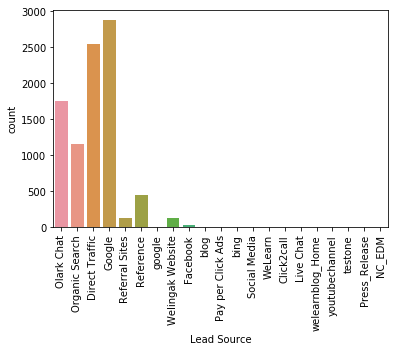

In [34]:
sns.countplot(data['Lead Source'])
xticks(rotation = 90)

In [35]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

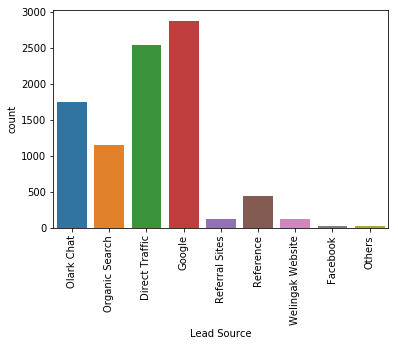

In [36]:
sns.countplot(data['Lead Source'])
xticks(rotation = 90)

## 2.6  Univariate analysis wrt to target variable Converted

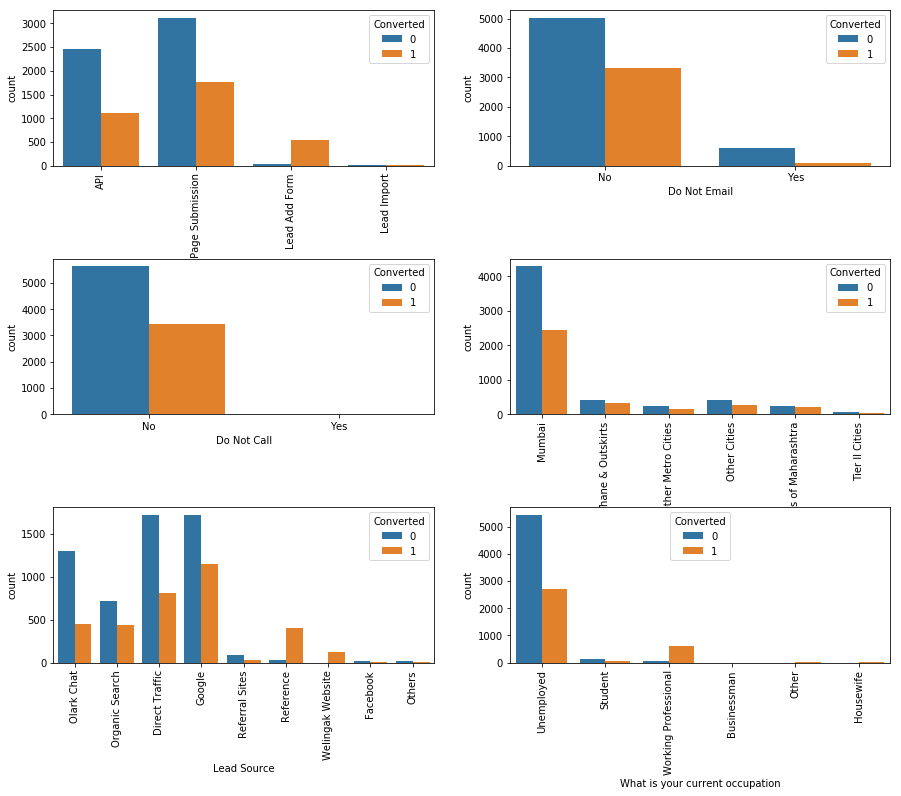

In [37]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(  hspace=0.6)
# plot
plt.subplot(3,2,1)
xticks(rotation = 90)
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)

# plot
plt.subplot(3,2,2)
sns.countplot(x = "Do Not Email", hue = "Converted", data = data)

plt.subplot(3,2,3)
# plot
sns.countplot(x = "Do Not Call", hue = "Converted", data = data)

plt.subplot(3,2,4)
xticks(rotation = 90)
sns.countplot(x = "City", hue = "Converted", data = data)

plt.subplot(3,2,5)
xticks(rotation = 90)
sns.countplot(x = "Lead Source", hue = "Converted", data = data)

plt.subplot(3,2,6)
xticks(rotation = 90)
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)



In [38]:
#checking value counts for Do Not Call
data['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [39]:

#checking value counts for Do Not Email
data['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

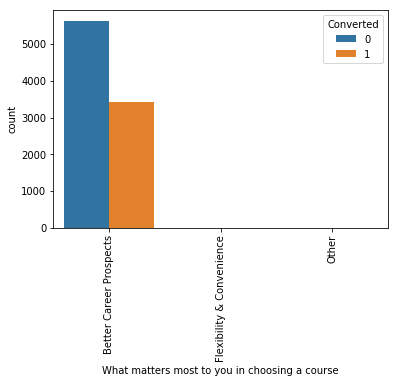

In [40]:
xticks(rotation = 90)
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = data)



In [41]:
#checking value counts of variable
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

# Inferences

## I.1  Lead Origin

* Lead Add Form has more than 90% conversion rate but count of lead are not very high.
* Lead Import are very less in count.
* To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

## I.2 Lead Source

* Google and Direct traffic generates maximum number of leads.
* Conversion Rate of reference leads and leads through welingak website is high.
* To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.


## I.3 What is your current occupation
* Working Professionals going for the course have high chances of joining it.
* Unemployed leads are the most in terms of Absolute numbers.

## I.4 What matters most to you in choosing a course , Do Not call
* we can drop these column as there is only one major value

In [42]:
#also lets drop country as it has major value as India
data.drop(['What matters most to you in choosing a course' ,'Country' ,'Do Not Call'], 1, inplace = True)
data.head(3)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened


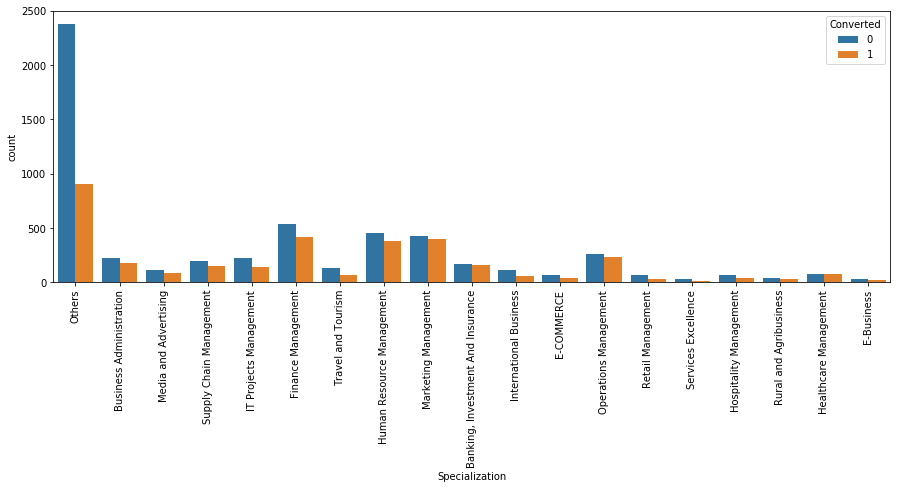

In [43]:
## lets look at specialisation field again

plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data )
xticks(rotation = 90)
plt.show()

### We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.
* we can combine Management Specializations because they show similar trends

In [44]:
data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

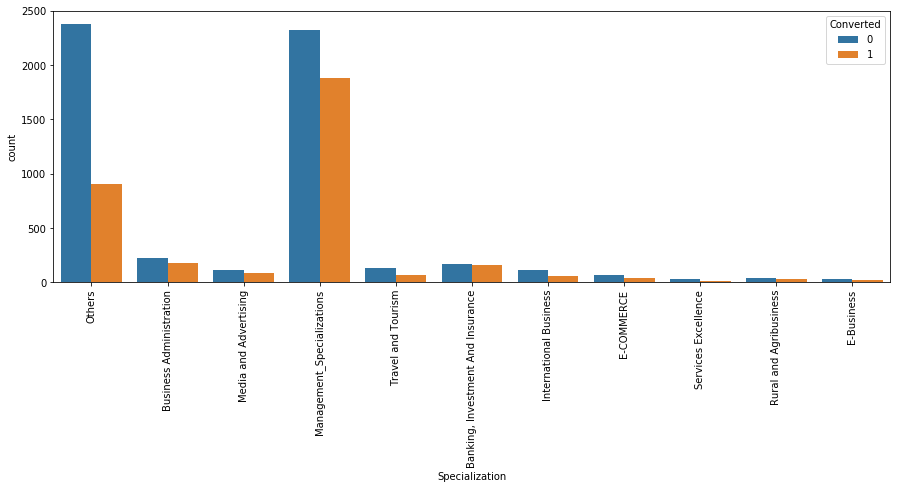

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = data )
xticks(rotation = 90)
plt.show()

### Tag variable

In [46]:
#checking value counts of Tag variable
data['Tags'].value_counts(dropna=False)

Unknown                                              3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

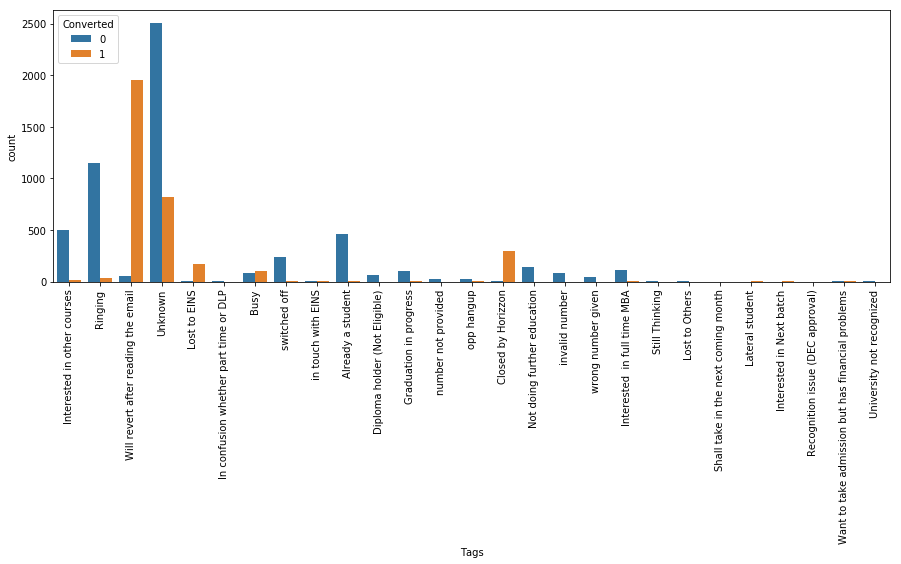

In [47]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data )
xticks(rotation = 90)
plt.show()

In [48]:

#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')


#tags with low conversion
data['Tags'] = data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

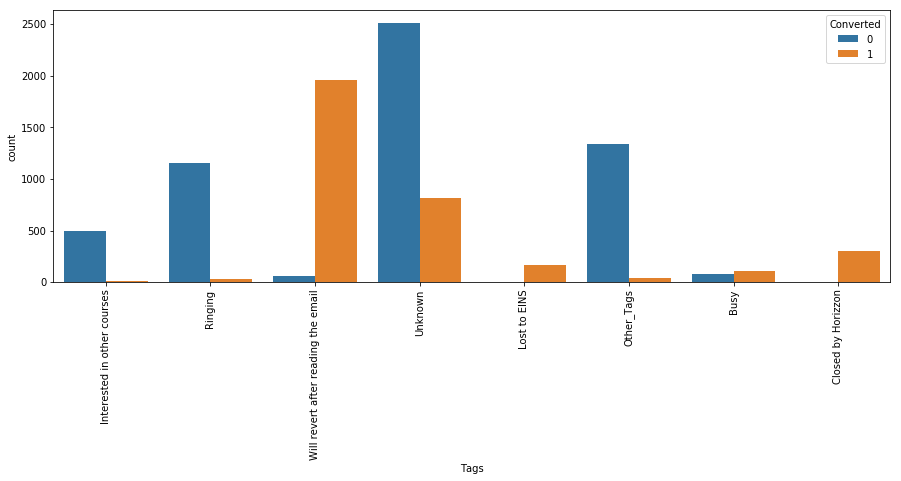

In [49]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data )
xticks(rotation = 90)
plt.show()

### Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

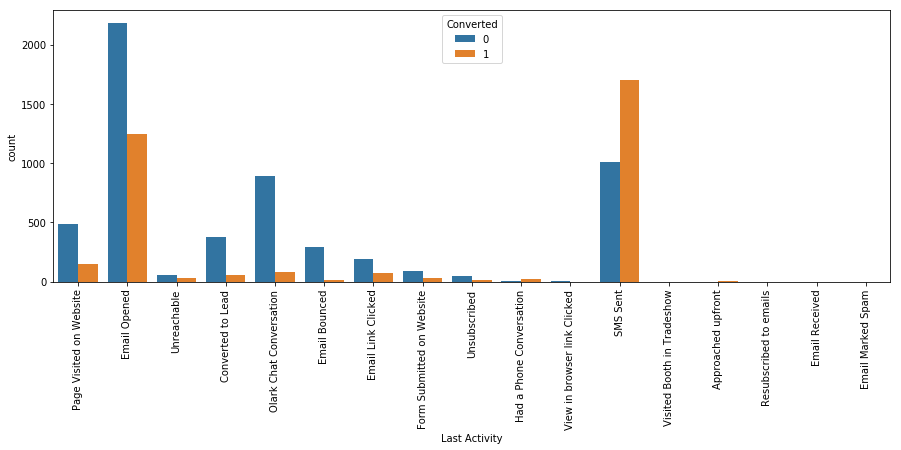

In [50]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [51]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

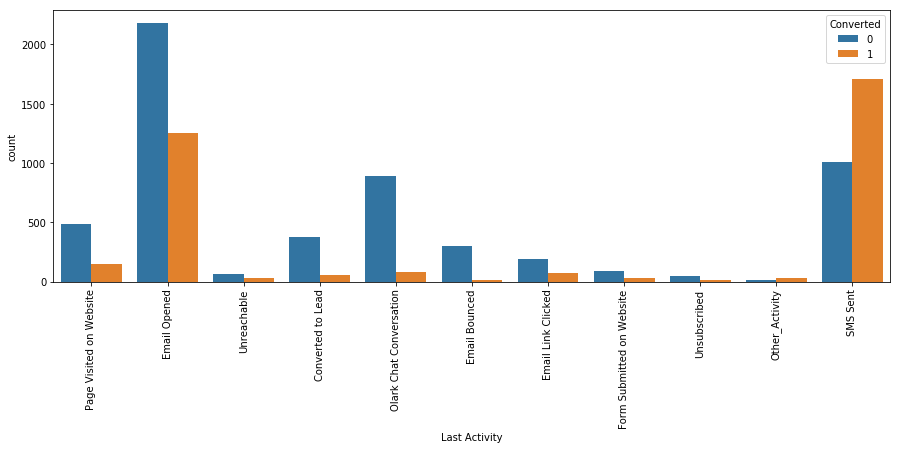

In [52]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## I.6 Last Activity
* Most of the lead have their Email opened as their last activity.
* Conversion rate for leads with last activity as SMS Sent is highest


### Identifying more Imbalance columns to drop (that have one majority value) yes/no

In [53]:
print("\n------------Search------------")
print(data.Search.value_counts(dropna=False))

print("\n\n------------Magazine------------")
print(data.Magazine.value_counts(dropna=False))

print("\n\n------------Newspaper Article'------------")
print(data['Newspaper Article'].value_counts(dropna=False))

print("\n\n------------X Education Forums'------------")
print(data['X Education Forums'].value_counts(dropna=False))

print("\n\n------------Newspaper'------------")
print(data['Newspaper'].value_counts(dropna=False))

print("\n\n------------Digital Advertisement'------------")
print(data['Digital Advertisement'].value_counts(dropna=False))

print("\n\n------------Through Recommendations'------------")
print(data['Through Recommendations'].value_counts(dropna=False))

print("\n\n------------A free copy of Mastering The Interview'------------")
print(data['A free copy of Mastering The Interview'].value_counts(dropna=False))

print("\n\n------------I agree to pay the amount through cheque'------------")
print(data['I agree to pay the amount through cheque'].value_counts(dropna=False))

print("\n\n------------Get updates on DM Content'------------")
print(data['Get updates on DM Content'].value_counts(dropna=False))

print("\n\n------------Update me on Supply Chain Content'------------")
print(data['Update me on Supply Chain Content'].value_counts(dropna=False))





------------Search------------
No     9060
Yes      14
Name: Search, dtype: int64


------------Magazine------------
No    9074
Name: Magazine, dtype: int64


------------Newspaper Article'------------
No     9072
Yes       2
Name: Newspaper Article, dtype: int64


------------X Education Forums'------------
No     9073
Yes       1
Name: X Education Forums, dtype: int64


------------Newspaper'------------
No     9073
Yes       1
Name: Newspaper, dtype: int64


------------Digital Advertisement'------------
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64


------------Through Recommendations'------------
No     9067
Yes       7
Name: Through Recommendations, dtype: int64


------------A free copy of Mastering The Interview'------------
No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


------------I agree to pay the amount through cheque'------------
No    9074
Name: I agree to pay the amount through cheque, dtype: int64


----------

In [54]:
## dropping all columns that have high no value
data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'] , axis=1 , inplace=True)

In [55]:
data.head(5)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


### last Notable Activity

In [56]:
#checking value counts of last Notable Activity
data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [57]:
#clubbing lower frequency values

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

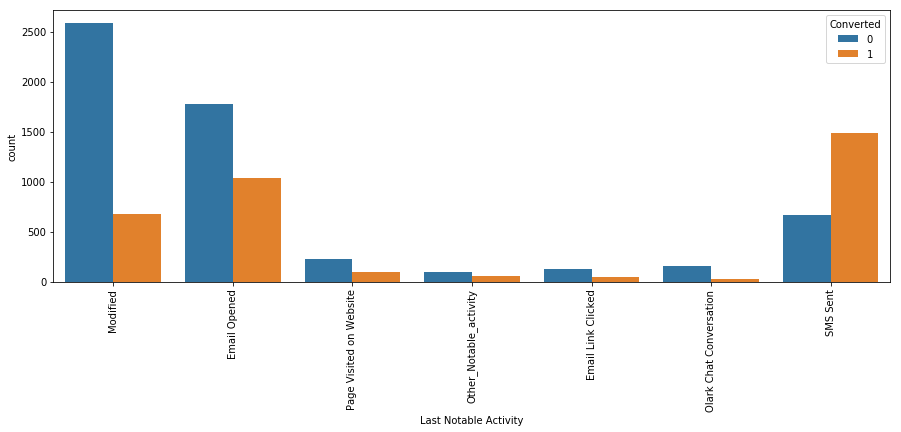

In [58]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

## 2.7 Numerical Attributes Analysis:

In [59]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

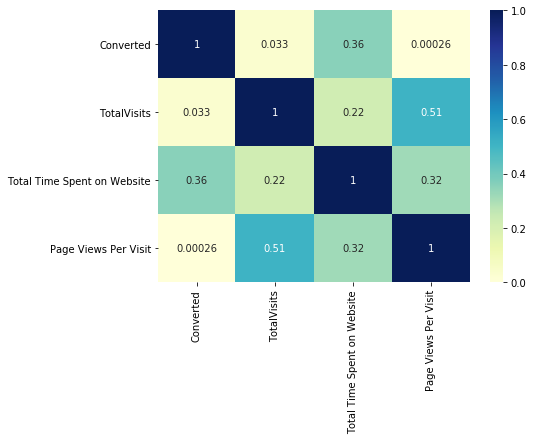

In [60]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(7,5))

# heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### TotalVisits

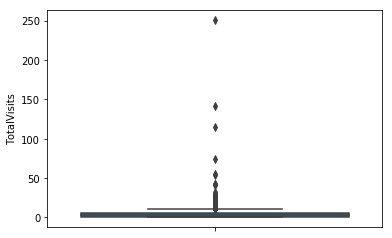

In [61]:

plt.figure(figsize=(6,4))
sns.boxplot(y=data['TotalVisits'])
plt.show()

In [62]:
#Removing Outliers
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [63]:
#Lets cap the outliers to 99
percentiles = data['TotalVisits'].quantile([0.01,0.99]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [64]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.343178
std         3.252302
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max        17.000000
Name: TotalVisits, dtype: float64

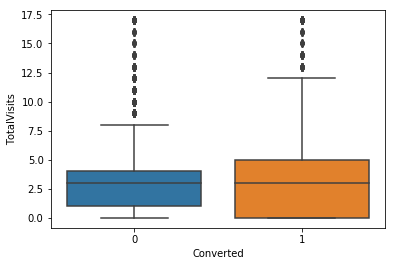

In [65]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

## I.7 TotalVisits
* Median for converted and not converted leads are the same.
* Nothng conclusive can be said on the basis of Total Visits.

### Total Time Spent on Website

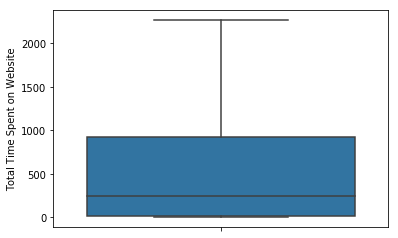

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(y=data['Total Time Spent on Website'])
plt.show()

In [67]:
data['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
5%          0.000000
25%        11.000000
50%       246.000000
75%       922.750000
90%      1373.000000
95%      1557.000000
99%      1839.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

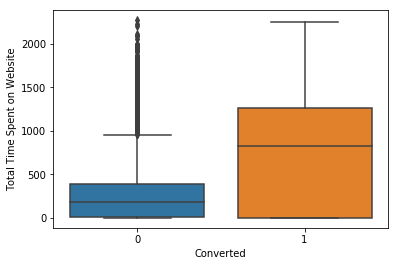

In [68]:
##No outliers
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

## I.8 Total Time spent on website
* Leads spending more time on the website are more likely to be converted.

### Page Views Per Visit

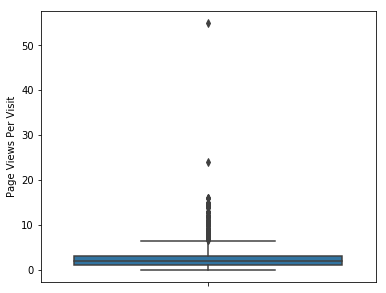

In [69]:
plt.figure(figsize=(6,5))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

In [70]:
data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [71]:
## Outliers cap to 99 percent
percentiles = data['Page Views Per Visit'].quantile([0.01,0.99]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [72]:
data['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        2.341241
std         1.984635
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
99%         9.000000
max         9.000000
Name: Page Views Per Visit, dtype: float64

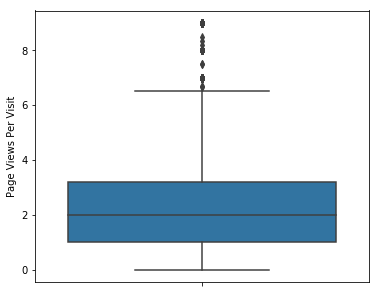

In [73]:
plt.figure(figsize=(6,5))
sns.boxplot(y=data['Page Views Per Visit'])
plt.show()

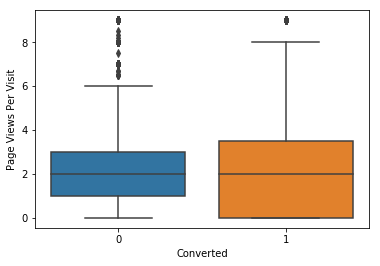

In [74]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

In [75]:
data.shape

(9074, 15)

# 3 Data Preparation

In [76]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened


### 3.1 Converting  binary variables (Yes/No) to 1/0 

In [77]:

var =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def bmap(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[var] = data[var].apply(bmap)

In [78]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened


### 3.2 Creating Dummy Variable for Categorical Variable

In [79]:
#get list of categorical variables
data.select_dtypes(include=['object']).columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

In [80]:
#Creating Dummy Variables and dropping first One
dummyvar = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummyvar.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
# concat the dummy columns  to the data
data = pd.concat([data, dummyvar], axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,1,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,1,0,0,0,0


In [82]:
#drop original Columns
data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1 , inplace=True)

In [83]:
data.head(3)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# 4 Model Building

### 4.1 Train-Test Split 

In [84]:
# Putting response variable to y
y = data['Converted']
X=data.drop('Converted', axis=1)

In [85]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4.2 Scalling the data

In [86]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\ksimran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ksimran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,-0.417238,-0.160255,-0.177298,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,-0.417238,-0.540048,-0.177298,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,0,-1.034493,-0.888650,-1.183128,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4750,0,-0.417238,1.643304,-0.177298,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0,0.508645,2.017593,0.074159,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### 4.3 Model Building using Stats Model & RFE

In [87]:

logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [88]:
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Num Features: 15
Selected Features: [ True False  True False False False  True False False False  True False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True  True  True  True False  True
 False False False  True False False False False False  True False False
  True False  True]
Feature Ranking: [ 1 24  1 23 22  6  1 11 45 42  1 33 15 19 28  1 44 40 26 47  5 10 41  2
 32 31 34 35 17 14 36 30 21 29 18  9 38 48 25 16  8  1  1  1  1  1  7  1
 39  4  3  1 27 46 43 20 37  1 12 13  1 49  1]


In [89]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Worst',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [90]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1185.6
Date:                Thu, 23 Jul 2020   Deviance:                       2371.3
Time:                        23:22:14   Pearson chi2:                 8.66e+03
No. Iterations:                     8   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6966      0.123    -22.007      0.000      -2.937      -2.456
Do Not Email                                    -1.2724      0.279     -4.564      0.000      -1.819      -0.726
Total Time Spent on Website                      1.1658      0.064     18.229      0.000       1.040       1.291
Lead Origin_Lead Add Form                        2.1015      0.444      4.728      0.000       1.230       2.973
Lead Source_Olark Chat                           1.3036      0.150      8.677      0.000       1.009       1.598
Lead Source_Welingak Website                     3.9477      0.870      4.540      0.000       2.243       5.652
Tags_Closed by Horizzon                          6.4680      0.733      8.826      0.000       5.032       7.904
Tags_Interested in other courses                -1.6447      0.340     -4.832      0.000      -2.312      -0.978
Tags_Lost to EINS                                6.0737      0.743      8.171      0.000       4.617       7.530
Tags_Other_Tags                                 -2.3805      0.231    -10.304      0.000      -2.833      -1.928
Tags_Ringing                                    -3.9287      0.267    -14.702      0.000      -4.452      -3.405
Tags_Will revert after reading the email         4.6670      0.201     23.264      0.000       4.274       5.060
Lead Quality_Worst                              -1.7927      0.794     -2.257      0.024      -3.349      -0.236
Last Notable Activity_Email Opened               1.1294      0.133      8.485      0.000       0.869       1.390
Last Notable Activity_Other_Notable_activity     1.7684      0.443      3.990      0.000       0.900       2.637
Last Notable Activity_SMS Sent                   3.3496      0.153     21.909      0.000       3.050       3.649
================================================================================================================
"""

#### Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.83
10,Tags_Will revert after reading the email,1.80
14,Last Notable Activity_SMS Sent,1.64
8,Tags_Other_Tags,1.56
11,Lead Quality_Worst,1.46
1,Total Time Spent on Website,1.45
12,Last Notable Activity_Email Opened,1.43
4,Lead Source_Welingak Website,1.36
3,Lead Source_Olark Chat,1.32
9,Tags_Ringing,1.25


In [92]:
#No High VIF lets get the predicted value
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.147537
1012    0.055711
9226    0.001730
4750    0.928821
7987    0.996761
1281    0.998322
2880    0.069481
4971    0.946468
7536    0.998157
1248    0.011438
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14753651, 0.05571138, 0.00173015, 0.92882109, 0.99676084,
       0.99832231, 0.06948136, 0.94646804, 0.99815733, 0.01143797])

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,0,0.147537,3009
1,0,0.055711,1012
2,0,0.001730,9226
3,1,0.928821,4750
4,1,0.996761,7987
5,1,0.998322,1281
6,0,0.069481,2880
7,1,0.946468,4971
8,1,0.998157,7536
9,0,0.011438,1248


In [95]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.147537,3009,0
1,0,0.055711,1012,0
2,0,0.001730,9226,0
3,1,0.928821,4750,1
4,1,0.996761,7987,1
5,1,0.998322,1281,1
6,0,0.069481,2880,0
7,1,0.946468,4971,1
8,1,0.998157,7536,1
9,0,0.011438,1248,0


### Confusion Metrix

In [96]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )

print(confusion)

[[3743  162]
 [ 285 2161]]


In [97]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9296173830892773


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.883483237939493

In [100]:
# Let us calculate specificity
TN / float(TN+FP)

0.9585147247119078

In [101]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04148527528809219


In [102]:
# positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))

0.930262591476539
0.9292452830188679


### PLOTTING ROC CURVE
### An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

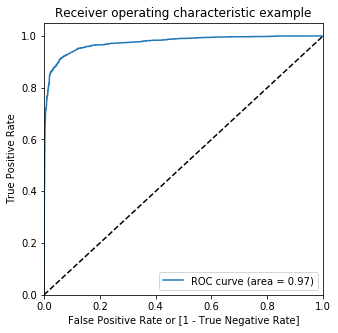

In [103]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point
#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.147537,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.055711,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.001730,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.928821,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996761,7987,1,1,1,1,1,1,1,1,1,1,1


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.858762  0.966067  0.791549
0.2   0.2  0.906629  0.950531  0.879129
0.3   0.3  0.927413  0.917007  0.933931
0.4   0.4  0.929302  0.902289  0.946223
0.5   0.5  0.929617  0.883483  0.958515
0.6   0.6  0.930877  0.864677  0.972343
0.7   0.7  0.929617  0.849959  0.979513
0.8   0.8  0.912770  0.797629  0.984891
0.9   0.9  0.895135  0.742437  0.990781


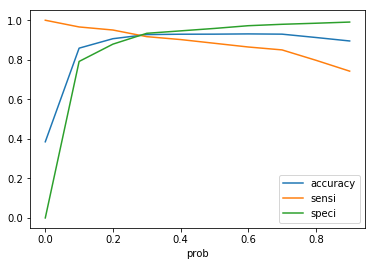

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [107]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.147537,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.055711,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.001730,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.928821,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.996761,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.147537,3009,0,15
1,0,0.055711,1012,0,6
2,0,0.001730,9226,0,0
3,1,0.928821,4750,1,93
4,1,0.996761,7987,1,100


In [109]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9274130058258542

In [110]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3647,  258],
       [ 203, 2243]], dtype=int64)

In [111]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))
# Let us calculate specificity
print(TN / float(TN+FP))

0.9170073589533932
0.9339308578745198


## Observation:
### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

* Accuracy : 92.29%
* Sensitivity : 91.70%
* Specificity : 93.39%

## Making predictions on the test set

In [113]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

C:\Users\ksimran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ksimran\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3271,-0.292789,0.206475,-0.591008,0.853140,-0.693903,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1490,-0.292789,0.511373,1.894051,1.359420,1.441123,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,-0.292789,-0.403321,-0.743117,-0.159420,-0.693903,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4216,-0.292789,-1.013117,-0.878732,-1.171979,-0.693903,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,-0.292789,1.426068,-0.578179,2.878260,1.441123,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [114]:
X_test = X_test[col]
print(col)
X_test.head()

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Worst',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Other_Notable_activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Worst,Last Notable Activity_Email Opened,Last Notable Activity_Other_Notable_activity,Last Notable Activity_SMS Sent
3271,-0.292789,-0.591008,0,0,0,0,0,0,0,0,0,0,1,0,0
1490,-0.292789,1.894051,0,0,0,0,0,0,0,0,1,0,1,0,0
7936,-0.292789,-0.743117,0,0,0,0,0,0,0,0,0,0,1,0,0
4216,-0.292789,-0.878732,1,0,0,1,0,0,0,0,0,0,0,0,0
3830,-0.292789,-0.578179,0,0,0,0,0,0,0,0,0,0,1,0,0


In [115]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_train_pred[:10]

array([0.14753651, 0.05571138, 0.00173015, 0.92882109, 0.99676084,
       0.99832231, 0.06948136, 0.94646804, 0.99815733, 0.01143797])

In [116]:
y_train_pred[:10]

array([0.14753651, 0.05571138, 0.00173015, 0.92882109, 0.99676084,
       0.99832231, 0.06948136, 0.94646804, 0.99815733, 0.01143797])

In [117]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3271,0.131965
1490,0.996600
7936,0.112942
4216,0.994627
3830,0.133687


In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [119]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.131965
1,1,1490,0.996600
2,0,7936,0.112942
3,1,4216,0.994627
4,0,3830,0.133687


In [120]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.131965
1,1,1490,0.996600
2,0,7936,0.112942
3,1,4216,0.994627
4,0,3830,0.133687


In [121]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.131965,13
1,1490,1,0.996600,100
2,7936,0,0.112942,11
3,4216,1,0.994627,99
4,3830,0,0.133687,13


In [122]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3271,0,0.131965,13,0
1,1490,1,0.996600,100,1
2,7936,0,0.112942,11,0
3,4216,1,0.994627,99,1
4,3830,0,0.133687,13,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9092912229159016

In [124]:
## Confusion Metrics
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1590,  144],
       [ 103,  886]], dtype=int64)

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8958543983822043

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.916955017301038

## Asiign Lead Score to train Data as well

In [127]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.147537,3009,0,1,1,0,0,0,0,0,0,0,0,0,15
1,0,0.055711,1012,0,1,0,0,0,0,0,0,0,0,0,0,6
2,0,0.001730,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.928821,4750,1,1,1,1,1,1,1,1,1,1,1,1,93
4,1,0.996761,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


# Final Observation:
## Let us compare the values obtained for Train & Test:

### Train Data: 
* Accuracy : 92.96%
* Sensitivity : 91.70%
* Specificity : 93.39%
### Test Data: 
* Accuracy : 90.92%
* Sensitivity : 89.58%
* Specificity : 91.69%
#### The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model